Python 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.5.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np  

###################################################
################ Importing Data #################
###################################################

In [2]:
df1 = pd.read_csv("abalone.csv", encoding='ISO-8859-1')
print(len(df1))
df1.head()

4177


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# Rename target to 'Target'
df1 = df1.rename(columns = {'Rings':'Target'})
df1.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Target
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# Check Distribution of Target Var
df1['Target'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Target, dtype: int64

In [5]:
# converting to 3 categories for ease of implementation (10, 9, 8+)
df1.loc[ (df1['Target'] != 9) & (df1['Target'] != 10) , 'Target'] = 8
print(df1['Target'].value_counts())
df1.head(10)

8     2854
9      689
10     634
Name: Target, dtype: int64


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Target
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,8
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,8
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,8
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,8


###################################################
################ Dummy Coding #################
###################################################

In [6]:
df2 = df1.copy()
df2_new = df2.copy()
for i in range(len(df2.columns)):
        if (df2.iloc[:,i].dtype==np.object or df2.iloc[:,i].dtype.name=="category"):
            df2_dummy = pd.get_dummies(df2.iloc[:,i]) # ignores NA
            for j in range(len(df2_dummy.columns)):
                df2_dummy.columns.values[j] = df2.columns.values[i] + "_" + df2_dummy.columns.values[j]
            df2_new = pd.concat([df2_new, df2_dummy], axis=1)
for y in df2_new.columns: # new vars created are of type ‘uint8’, so converting to int
     if(df2_new [y].dtype == np.uint8):
        df2_new [y] = df2_new [y].astype('int')
        
dfx = df2_new.copy()
S_List_Numeric = []
S_List_Non_Numeric = []
for i in range(len(dfx.columns)):
    if (dfx.iloc[:,i].dtype==np.int64 or dfx.iloc[:,i].dtype==np.float64 or dfx.iloc[:,i].dtype==np.int32 or dfx.iloc[:,i].dtype==np.float32 or dfx.iloc[:,i].dtype==np.int16 or dfx.iloc[:,i].dtype==np.float16):
        S_List_Numeric.append(i)
    else:
        S_List_Non_Numeric.append(i)
dfx_Numeric = dfx.iloc[:,S_List_Numeric]
     
df2 = dfx_Numeric.copy()
df2.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Target,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,8,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8,0,1,0


In [7]:
# drop last variable of dummy coding (for each cat var)
df2 = df2.drop(['Sex_M'],axis=1)
df2.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Target,Sex_F,Sex_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,8,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8,0,1


###################################################
############# Train-Vald-Test Split ##############
###################################################

In [309]:
# 70:15:15
np.random.seed(4)
msk = np.random.rand(len(df2)) < 0.7

# Train set
Train = df2[msk]

Vald_Test = df2[~msk]
msk = np.random.rand(len(Vald_Test)) < 0.5

# Vald and Test sets
Vald = Vald_Test[msk]
Test = Vald_Test[~msk]

# QC
print(len(Train))
print(len(Vald))
print(len(Test))
len(Train)+len(Vald)+len(Test) == len(df2)

2912
651
614


True

###################################################
########### Separate X & Y of all datasets ############
###################################################

In [567]:
X_Train = Train.drop(['Target'], axis=1)
Y_Train = Train[["Target"]]
X_Train = X_Train.as_matrix()
Y_Train = np.asarray(Y_Train).flatten()

X_Vald = Vald.drop(['Target'], axis=1)
Y_Vald = Vald[["Target"]]
X_Vald = X_Vald.as_matrix()
Y_Vald = np.asarray(Y_Vald).flatten()

X_Test = Test.drop(['Target'], axis=1)
Y_Test = Test[["Target"]]
X_Test = X_Test.as_matrix()
Y_Test = np.asarray(Y_Test).flatten()

# QC
len(X_Train)+len(X_Vald)+len(X_Test) == len(df2)

/home/antrived/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/antrived/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/antrived/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


True

###################################################
############# Mean Standardization ##############
###################################################

In [568]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Vald = sc.transform(X_Vald)
X_Test = sc.transform(X_Test)

#####################################################################
############# XGBoost (Multi-class) ##############
#####################################################################

#######
####### Training (Base Model) & Validation
#######

In [569]:
# Import classification related packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error
from sklearn.metrics import classification_report

def common_predictions(model, X_test, Y_test):
    y_pred = model.predict(X_test)
    y_pred = y_pred.astype(int)
#     y_pred[y_pred > 0.5] = 1
#     y_pred[y_pred <= 0.5] = 0
    return y_pred

In [570]:
## Training
from xgboost import XGBClassifier
def xgb_classifier(X_Train, Y_Train, max_depth, learning_rate, n_estimators, objective):
    model = XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, objective=objective)
    model.fit(X_Train, Y_Train)
    return model

# multi-class classification
model = xgb_classifier(X_Train, Y_Train, max_depth=12, learning_rate=0.05, 
                       n_estimators=100, objective='multi:softmax')

In [571]:
## Prediction (class)
y_pred = common_predictions(model, X_Vald, Y_Vald)

## Prediction (probabilities)
    # use 'predict_proba'

In [572]:
## Validation Accuracy
cm1 = confusion_matrix(y_pred, Y_Vald)
print(cm1)
print(classification_report(Y_Vald, y_pred))
# Micro Avg = Avg like this: P=(Match_1+Match_2+Match_3)/(Actual_1+Actual_2+Actual_3)
# Macro Avg = Avg of (P,R) for individual classes
# Weighted Avg = f-score weighted on support

    # Micro vs Macro Avg - 1 literature said micro is good for 
        # skewed multi-class classification(its wrong info); but in one experiment 
        # on skewed data, micro-avg was giving incorrect picture and macro was much better
        # so, macro-avg is the best indicator for skewed data
    # Macro Avg best for Skewed data - best for skewed data for both binary and 
        # multi-class classification as it gives equal weightage to classes 
        # irrespective of their occurance (if all classes are importance)

    # Ref: https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin
    
# get micro_f1, macro_f1, weighted_f1 (use to optimize params)
temp = classification_report(Y_Vald, y_pred)
list1 = temp.split()

first_class_f1 = list1[7]
last_class_f1 = list1[len(list1)-20]
micro_f1 = list1[len(list1)-14]
macro_f1 = list1[len(list1)-8]
wtd_f1 = list1[len(list1)-2]

print("first_class_f1: {}".format(first_class_f1))
print("last_class_f1: {}".format(last_class_f1))
print("micro_f1: {}".format(micro_f1))
print("macro_f1: {}".format(macro_f1))
print("wtd_f1: {}".format(wtd_f1))

# use micro_f1 for skewed multi-class classification

[[373  74  87]
 [ 38  15  13]
 [ 27  12  12]]
              precision    recall  f1-score   support

           8       0.70      0.85      0.77       438
           9       0.23      0.15      0.18       101
          10       0.24      0.11      0.15       112

   micro avg       0.61      0.61      0.61       651
   macro avg       0.39      0.37      0.36       651
weighted avg       0.55      0.61      0.57       651

first_class_f1: 0.77
last_class_f1: 0.15
micro_f1: 0.61
macro_f1: 0.36
wtd_f1: 0.57


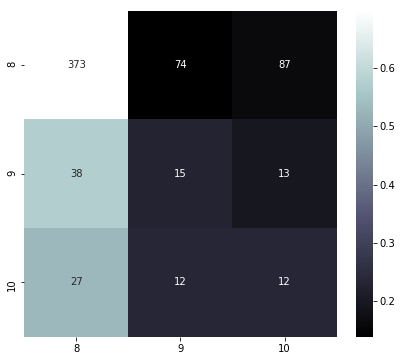

In [319]:
## Plot Confusion Matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('confusion-matrix.png')

plot_confusion_matrix(cm1, ['8', '9', '10'])
# ref: https://github.com/gabrielziegler3/xgboost-multiclass-multilabel/blob/master/xgboost-multiclass-multilabel/multiclass-classification-examples.ipynb

#######
####### Hyper-Param Tuning (K-fold CV) - Grid/Random Search
####### 1st Approach - Recommended
####### (easily extensible to other algorithms)
#######

In [542]:
## Training
from xgboost import XGBClassifier
def xgb_classifier(X_Train, Y_Train, max_depth, learning_rate, n_estimators, objective):
    model = XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, objective=objective)
    model.fit(X_Train, Y_Train)
    return model

# multi-class classification
clf = xgb_classifier(X_Train, Y_Train, max_depth=12, learning_rate=0.05, 
                       n_estimators=100, objective='multi:softmax')

In [558]:
## Training

# !pip install scikit-learn
import sys
import math
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_validate
sys.path.append('xgboost/wrapper/')
import xgboost as xgb

# USER INPUT
acc_type = 'f1_macro'
    # 'f1_micro', 'f1_macro', 'f1_weighted', 
    # refer: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring
cv_folds = 5
# also change 'objective': 'multi:softprob' as appropriate
search_type = 'GridSearchCV' # 'RandomizedSearchCV', 'GridSearchCV'
iters_rand_search = 20 # applies for 'RandomizedSearchCV'
# set algo seach 'parameters' below

parameters = {
#     'n_estimators': [100, 150, 200, 250, 300], # no of trees
    'learning_rate': [0.001, 0.1],
    'max_depth': [8, 12], # doesn't work for too small values like [1, 2]
#     'gamma': [0, 0.2],
#     min_child_weight=1,
#     max_delta_step=0,
#     subsample=1,
#     'colsample_bytree': [0.7, 0.8, 1],
#     colsample_bylevel=1,
#     colsample_bynode=1,
#     reg_alpha=0,
#     reg_lambda=1,
#     scale_pos_weight=1,
}

if search_type == 'GridSearchCV':
    clf = GridSearchCV(clf, parameters, n_jobs=1, cv=cv_folds, scoring=acc_type)
elif search_type == 'RandomizedSearchCV':
    clf = RandomizedSearchCV(clf, parameters, n_jobs=1, 
                             cv=cv_folds, n_iter=iters_rand_search, scoring=acc_type)
    # 'n_iter' in random_search allows to do limited searches in a bigger search space
        # say 100 random searches in a search space of 10,000
        
clf.fit(X_Train, Y_Train)
print(clf.cv_results_)

print("------- Ranks(lower is good) -------")
print(clf.cv_results_['rank_test_score'])

list1 = list(clf.cv_results_['mean_test_score'])
best_loc = list1.index( max(list1) )

print("--- Best Location ---")
print(best_loc)

print("------- Best Score -------")
print(clf.cv_results_['mean_test_score'][best_loc])
print("------- Best Params -------")
print(clf.cv_results_['params'][best_loc])

# Insight: Even after 5 fold CV, model may seem to overfit for acc. metrics 
    # affected by skewed target like 'macro_f1'

{'mean_fit_time': array([0.85001364, 1.36617203, 0.79413776, 1.20495996]), 'std_fit_time': array([0.02387393, 0.08311611, 0.01987935, 0.04923845]), 'mean_score_time': array([0.01070089, 0.01654735, 0.01387987, 0.02265778]), 'std_score_time': array([0.00165201, 0.00473083, 0.00121138, 0.00369148]), 'param_learning_rate': masked_array(data=[0.001, 0.001, 0.1, 0.1],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[8, 12, 8, 12],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'learning_rate': 0.001, 'max_depth': 8}, {'learning_rate': 0.001, 'max_depth': 12}, {'learning_rate': 0.1, 'max_depth': 8}, {'learning_rate': 0.1, 'max_depth': 12}], 'split0_test_score': array([0.32236208, 0.3336395 , 0.34170739, 0.35387556]), 'split1_test_score': array([0.381422  , 0.42110597, 0.41751559, 0.42008462]), 'split2_test_score': array([0.3837938 , 0.41723964,

In [559]:
## Prediction (class)
y_pred = common_predictions(clf, X_Vald, Y_Vald)

## Prediction (probabilities)
    # use 'predict_proba'

In [563]:
## Validation Accuracy
cm1 = confusion_matrix(y_pred, Y_Vald)
print(cm1)
print(classification_report(Y_Vald, y_pred))

# get micro_f1, macro_f1, weighted_f1 (use to optimize params)
temp = classification_report(Y_Vald, y_pred)
list1 = temp.split()

first_class_f1 = list1[7]
last_class_f1 = list1[len(list1)-20]
micro_f1 = list1[len(list1)-14]
macro_f1 = list1[len(list1)-8]
wtd_f1 = list1[len(list1)-2]

print("first_class_f1: {}".format(first_class_f1))
print("last_class_f1: {}".format(last_class_f1))
print("micro_f1: {}".format(micro_f1))
print("macro_f1: {}".format(macro_f1))
print("wtd_f1: {}".format(wtd_f1))

# use micro_f1 for skewed multi-class classification

[[371  75  86]
 [ 35  17  14]
 [ 32   9  12]]
              precision    recall  f1-score   support

           8       0.70      0.85      0.76       438
           9       0.26      0.17      0.20       101
          10       0.23      0.11      0.15       112

   micro avg       0.61      0.61      0.61       651
   macro avg       0.39      0.37      0.37       651
weighted avg       0.55      0.61      0.57       651

first_class_f1: 0.76
last_class_f1: 0.15
micro_f1: 0.61
macro_f1: 0.37
wtd_f1: 0.57


#######
####### Hyper-Param Tuning (K-fold CV) - Grid/Random Search
####### 2nd Approach (for custom score() function)
#######

In [463]:
# Pre-processing - bit different than above
X_Train = Train.drop(['Target'], axis=1)
Y_Train = Train[["Target"]]
X_Train = [ list(X_Train.iloc[x,:]) for x in range(len(X_Train)) ]
Y_Train = [ str(Y_Train.iat[x,0]) for x in range(len(Y_Train)) ]

X_Vald = Vald.drop(['Target'], axis=1)
Y_Vald = Vald[["Target"]]
X_Vald = [ list(X_Vald.iloc[x,:]) for x in range(len(X_Vald)) ]
# Y_Vald = [ str(Y_Vald.iat[x,0]) for x in range(len(Y_Vald)) ]

X_Test = Test.drop(['Target'], axis=1)
Y_Test = Test[["Target"]]
X_Test = [ list(X_Test.iloc[x,:]) for x in range(len(X_Test)) ]
# Y_Test = [ str(Y_Test.iat[x,0]) for x in range(len(Y_Test)) ]

# QC
print( len(X_Train)+len(X_Vald)+len(X_Test) == len(df2) )
print(X_Train[0:3])
print(Y_Train[0:3])

True
[[0.35, 0.265, 0.09, 0.2255, 0.0995, 0.0485, 0.07, 0.0, 0.0], [0.33, 0.255, 0.08, 0.205, 0.0895, 0.0395, 0.055, 0.0, 1.0], [0.425, 0.3, 0.095, 0.3515, 0.141, 0.0775, 0.12, 0.0, 1.0]]
['8', '8', '8']


In [564]:
## Training

# Implementation Link:
    # https://inclass.kaggle.com/tanitter/grid-search-xgboost-with-scikit-learn
# Customized the code in link

# !pip install scikit-learn
import sys
import math
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_validate
sys.path.append('xgboost/wrapper/')
import xgboost as xgb

# USER INPUT
accuracy_type = 'macro_f1' 
    # 'first_class_f1', 'last_class_f1', 'micro_f1', 'macro_f1', 'wtd_f1', 'logloss'
cv_folds = 3
num_class = 3
# also change 'objective': 'multi:softprob' as appropriate
search_type = 'GridSearchCV' # 'RandomizedSearchCV', 'GridSearchCV'
iters_rand_search = 10 # applies for 'RandomizedSearchCV'
# set algo seach 'parameters' below

class XGBoostClassifier():
    
    def __init__(self, num_boost_round=10, **params):
        self.clf = None
        self.num_boost_round = num_boost_round
        self.params = params
        self.params.update({'objective': 'multi:softprob'}) # USER_INPUT
            # binary classification - 'binary:logistic'
            # linear regression - 'reg:linear'

    def fit(self, X, y, num_boost_round=None):
        num_boost_round = num_boost_round or self.num_boost_round
        self.label2num = {label: i for i, label in enumerate(sorted(set(y)))}
        dtrain = xgb.DMatrix(X, label=[self.label2num[label] for label in y])
        self.clf = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=num_boost_round)

    def predict(self, X):
        num2label = {i: label for label, i in self.label2num.items()}
        Y = self.predict_proba(X)
        y = np.argmax(Y, axis=1)
        return np.array([num2label[i] for i in y])

    def predict_proba(self, X):
        dtest = xgb.DMatrix(X)
        return self.clf.predict(dtest)

    def score(self, X, y):  
        if accuracy_type in ['first_class_f1', 'last_class_f1', 
                             'micro_f1', 'macro_f1', 'wtd_f1']:
            y = [int(x) for x in y]
            y_pred = self.predict(X)
            y_pred = y_pred.astype(int) 
            list1 = classification_report(y, y_pred).split()
            
            if accuracy_type == 'first_class_f1':
                acc = float(list1[7]) # first_class_f1
            elif accuracy_type == 'last_class_f1':
                acc = float(list1[len(list1)-20]) # last_class_f1  
            elif accuracy_type == 'micro_f1':
                acc = float(list1[len(list1)-14]) # micro_f1
            elif accuracy_type == 'macro_f1':
                acc = float(list1[len(list1)-8]) # macro_f1
            elif accuracy_type == 'wtd_f1':
                acc = float(list1[len(list1)-2]) # wtd_f1
        elif accuracy_type in ['logloss']:
            Y = self.predict_proba(X)
            acc = 1 / logloss(y, Y)
            
        return acc

    def get_params(self, deep=True):
        return self.params

    def set_params(self, **params):
        if 'num_boost_round' in params:
            self.num_boost_round = params.pop('num_boost_round')
        if 'objective' in params:
            del params['objective']
        self.params.update(params)
        return self
    
    
def logloss(y_true, Y_pred):
    label2num = dict((name, i) for i, name in enumerate(sorted(set(y_true))))
    return -1 * sum(math.log(y[label2num[label]]) if y[label2num[label]] > 0 else -np.inf for y, label in zip(Y_pred, y_true)) / len(Y_pred)


clf = XGBoostClassifier(
    eval_metric = 'auc',
    num_class = num_class,
    nthread = 4,
    silent = 1,
    )
parameters = {
    'num_boost_round': [100, 150], # no of trees
#     'eta': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.5, 0.7, 0.9, 1.1],
    'max_depth': [12, 14], # doesn't work for too small values like [1, 2]
#     'subsample': [0.6, 0.7, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.9, 1.0],
}

if search_type == 'GridSearchCV':
    clf = GridSearchCV(clf, parameters, n_jobs=1, cv=cv_folds)
elif search_type == 'RandomizedSearchCV':
    clf = RandomizedSearchCV(clf, parameters, n_jobs=1, 
                             cv=cv_folds, n_iter=iters_rand_search)
    # 'n_iter' in random_search allows to do limited searches in a bigger search space
        # say 100 random searches in a search space of 10,000
clf.fit(X_Train, Y_Train)
print(clf.cv_results_)

print("------- Ranks(lower is good) -------")
print(clf.cv_results_['rank_test_score'])

list1 = list(clf.cv_results_['mean_test_score'])
best_loc = list1.index( max(list1) )

print("--- Best Location ---")
print(best_loc)

print("------- Best Score -------")
print(clf.cv_results_['mean_test_score'][best_loc])
print("------- Best Params -------")
print(clf.cv_results_['params'][best_loc])

# Insight: Even after 5 fold CV, model may seem to overfit for acc. metrics 
    # affected by skewed target like 'macro_f1'

{'mean_fit_time': array([0.3234547 , 0.51096169, 0.38306268, 0.54103994]), 'std_fit_time': array([0.01719548, 0.01296334, 0.00961556, 0.00262967]), 'mean_score_time': array([0.01097727, 0.01918117, 0.01260416, 0.01668946]), 'std_score_time': array([0.00060003, 0.00120961, 0.00090051, 0.00058927]), 'param_max_depth': masked_array(data=[12, 12, 14, 14],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_num_boost_round': masked_array(data=[100, 150, 100, 150],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 12, 'num_boost_round': 100}, {'max_depth': 12, 'num_boost_round': 150}, {'max_depth': 14, 'num_boost_round': 100}, {'max_depth': 14, 'num_boost_round': 150}], 'split0_test_score': array([0.38, 0.39, 0.37, 0.37]), 'split1_test_score': array([0.42, 0.42, 0.4 , 0.4 ]), 'split2_test_score': array([0.43, 0.42, 0.42, 0.42]), 'mean_test_score': array([0.40999313, 0

In [565]:
## Prediction (class)
y_pred = clf.best_estimator_.predict(X_Vald)
y_pred = y_pred.astype(int)
print(y_pred[0:3])
print(len(y_pred))
print(type(y_pred))
## Prediction (probability)
    # use 'predict_proba' from class above

[8 9 8]
651
<class 'numpy.ndarray'>


In [566]:
## Validation Accuracy
# model = xgb_classifier(X_Train, Y_Train, max_depth=12, learning_rate=0.3, 
#                        n_estimators=250, objective='multi:softmax')
# c = common_predictions(model, X_Vald, Y_Vald)

cm1 = confusion_matrix(y_pred, Y_Vald)
print(cm1)
print(classification_report(Y_Vald, y_pred))

temp = classification_report(Y_Vald, y_pred)
list1 = temp.split()

first_class_f1 = list1[7]
last_class_f1 = list1[len(list1)-20]
micro_f1 = list1[len(list1)-14]
macro_f1 = list1[len(list1)-8]
wtd_f1 = list1[len(list1)-2]

print("first_class_f1: {}".format(first_class_f1))
print("last_class_f1: {}".format(last_class_f1))
print("micro_f1: {}".format(micro_f1))
print("macro_f1: {}".format(macro_f1))
print("wtd_f1: {}".format(wtd_f1))

# should be close to 'K-fold CV accuracy above

[[360  71  84]
 [ 43  20  16]
 [ 35  10  12]]
              precision    recall  f1-score   support

           8       0.70      0.82      0.76       438
           9       0.25      0.20      0.22       101
          10       0.21      0.11      0.14       112

   micro avg       0.60      0.60      0.60       651
   macro avg       0.39      0.38      0.37       651
weighted avg       0.55      0.60      0.57       651

first_class_f1: 0.76
last_class_f1: 0.14
micro_f1: 0.60
macro_f1: 0.37
wtd_f1: 0.57


#####################################################################
############# XGBoost (Regression) ##############
#####################################################################

In [128]:
# Regression
model = xgb_classifier(X_Train, Y_Train, max_depth=6, learning_rate=0.3, 
                       n_estimators=150, objective='reg:linear')
y_pred = common_predictions(model, X_Vald, Y_Vald)

# Validation
rmse = np.sqrt(mean_squared_error(Y_Vald, y_pred))
print("RMSE: %f" % (rmse))

/home/antrived/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/antrived/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 0.946333


In [255]:
# Random Search - not running
# Ref: https://stats.stackexchange.com/questions/183984/how-to-use-xgboost-cv-with-hyperparameters-optimization